In [445]:
import sys
import pickle
import pandas as pd
import numpy as np
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tester import test_classifier, dump_classifier_and_data

In [446]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.float_format', lambda x: '%.3f' % x)  

In [447]:
# 载入数据
data_dict = pickle.load(open("final_project_dataset.pkl", "r") ) 
data_df = pd.DataFrame(data_dict)

In [448]:
data_df.head(10)

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN
exercised_stock_options,1729541,257817,4046157,6680544,NaN,1599641,NaN,953136,3285,1624396,...,1668260,NaN,98718,3282960,1297049,NaN,NaN,139130,8308552,192758
expenses,13868,3486,56301,11200,129142,NaN,37172,17355,NaN,11892,...,NaN,51870,NaN,57838,81353,1413,NaN,NaN,53947,55097
from_messages,2195,NaN,29,NaN,NaN,NaN,4343,484,NaN,NaN,...,30,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN
from_poi_to_this_person,47,NaN,39,NaN,NaN,NaN,144,228,NaN,NaN,...,22,NaN,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
from_this_person_to_poi,65,NaN,0,NaN,NaN,NaN,386,108,NaN,NaN,...,7,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
person_df=data_df.transpose()
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [450]:
np.any(person_df.isnull())

False

In [451]:
person_df.replace('NaN',np.nan,inplace=True)

In [452]:
np.any(person_df.isnull())
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

In [453]:
len(person_df.loc[person_df['poi']==True])
# 查看总共有多少目标标记为POI

18

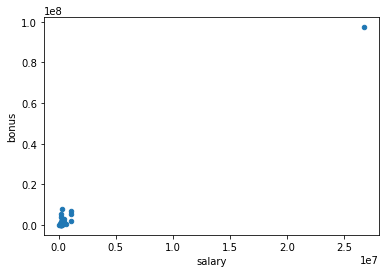

In [454]:
# 检查异常值并剔除
person_df.plot.scatter(x='salary',y='bonus')
plt.show()

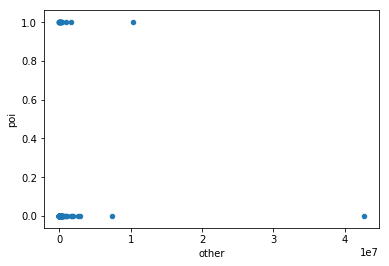

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.000,32083396.000,-27992891.000,1398517.000,NaN,311764000.000,5235198.000,nan,nan,nan,...,48521928.000,42667589.000,False,130322299.000,-7576788.000,26704229.000,nan,nan,309886585.000,434509511.000


In [455]:
person_df[['poi','other']]
person_df.plot.scatter(x='other',y='poi')
plt.show()
person_df.loc[person_df['other']==person_df['other'].max()]
# other的异常值也是total

In [456]:
# 查看每行的缺失情况
(person_df.shape[1] - person_df.count(axis=1)).sort_values(ascending=False)

LOCKHART EUGENE E                20
GRAMM WENDY L                    18
WROBEL BRUCE                     18
WHALEY DAVID A                   18
THE TRAVEL AGENCY IN THE PARK    18
WAKEHAM JOHN                     17
WODRASKA JOHN                    17
CLINE KENNETH W                  17
GILLIS JOHN                      17
SCRIMSHAW MATTHEW                17
SAVAGE FRANK                     17
MENDELSOHN JOHN                  16
YEAP SOON                        16
CHRISTODOULOU DIOMEDES           16
PEREIRA PAULO V. FERRAZ          16
BLAKE JR. NORMAN P               16
LOWRY CHARLES P                  16
CHAN RONNIE                      16
MEYER JEROME J                   16
GATHMANN WILLIAM D               16
WINOKUR JR. HERBERT S            16
FUGH JOHN L                      16
URQUHART JOHN A                  16
NOLES JAMES L                    15
WALTERS GARETH W                 15
BADUM JAMES P                    15
LEMAISTRE CHARLES                15
DUNCAN JOHN H               

In [457]:
person_df.loc[person_df.index=='LOCKHART EUGENE E']
# 该对象特征值全空

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,...,nan,nan,False,nan,nan,nan,nan,nan,nan,nan


In [458]:
# 名字分析不是一个人
with pd.option_context('display.max_rows', 146, 'display.max_columns', 1):
    print person_df
person_df.loc[person_df.index=='THE TRAVEL AGENCY IN THE PARK']

                                     bonus     ...     
ALLEN PHILLIP K                4175000.000     ...     
BADUM JAMES P                          nan     ...     
BANNANTINE JAMES M                     nan     ...     
BAXTER JOHN C                  1200000.000     ...     
BAY FRANKLIN R                  400000.000     ...     
BAZELIDES PHILIP J                     nan     ...     
BECK SALLY W                    700000.000     ...     
BELDEN TIMOTHY N               5249999.000     ...     
BELFER ROBERT                          nan     ...     
BERBERIAN DAVID                        nan     ...     
BERGSIEKER RICHARD P            250000.000     ...     
BHATNAGAR SANJAY                       nan     ...     
BIBI PHILIPPE A                1000000.000     ...     
BLACHMAN JEREMY M               850000.000     ...     
BLAKE JR. NORMAN P                     nan     ...     
BOWEN JR RAYMOND M             1350000.000     ...     
BROWN MICHAEL                          nan     .

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
THE TRAVEL AGENCY IN THE PARK,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,...,nan,362096.000,False,nan,nan,nan,nan,nan,362096.000,nan


In [459]:
# 剔除异常值
person_df.drop(['TOTAL'],inplace=True)
person_df.drop(['LOCKHART EUGENE E'],inplace=True)
person_df.drop(['THE TRAVEL AGENCY IN THE PARK'],inplace=True)


### 抛弃特征

In [460]:
# 没有任何数据缺失的对象
print(person_df.dropna(how='any'))
# 完全没有

Empty DataFrame
Columns: [bonus, deferral_payments, deferred_income, director_fees, email_address, exercised_stock_options, expenses, from_messages, from_poi_to_this_person, from_this_person_to_poi, loan_advances, long_term_incentive, other, poi, restricted_stock, restricted_stock_deferred, salary, shared_receipt_with_poi, to_messages, total_payments, total_stock_value]
Index: []

[0 rows x 21 columns]


In [461]:
person_df.isnull()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BADUM JAMES P,True,False,True,True,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,False,False
BANNANTINE JAMES M,True,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
BAXTER JOHN C,False,False,False,True,True,False,False,True,True,True,...,False,False,False,False,True,False,True,True,False,False
BAY FRANKLIN R,False,False,False,True,False,True,False,True,True,True,...,True,False,False,False,False,False,True,True,False,False
BAZELIDES PHILIP J,True,False,True,True,True,False,True,True,True,True,...,False,False,False,True,True,False,True,True,False,False
BECK SALLY W,False,True,True,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELDEN TIMOTHY N,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELFER ROBERT,True,False,True,False,True,False,True,True,True,True,...,True,True,False,True,False,True,True,True,False,False
BERBERIAN DAVID,True,True,True,True,False,False,False,True,True,True,...,True,True,False,False,True,False,True,True,False,False


缺失超过一般的特征由于数量不够而且部分数据比如restricted_stock_deferred的对象里完全没有poi，因此容易对最后的结果造成很大的误导故不选作为训练特征。  
保留下的特征有  
email_address                111 non-null object  
exercised_stock_options      102 non-null float64  
expenses                     95 non-null float64  
from_messages                86 non-null float64  
from_poi_to_this_person      86 non-null float64  
from_this_person_to_poi      86 non-null float64  
other                        93 non-null float64  
restricted_stock             110 non-null float64  
salary                       95 non-null float64  
shared_receipt_with_poi      86 non-null float64  
to_messages                  86 non-null float64  
total_payments               125 non-null float64  
total_stock_value            126 non-null float64  

接着移除email_address原因是与结果无关，
剔除的特征有  
email_address                111 non-null object   
deferral_payments            39 non-null float64  
deferred_income              49 non-null float64  
director_fees                17 non-null float64  
loan_advances                4 non-null float64  
long_term_incentive          66 non-null float64  
restricted_stock_deferred    18 non-null float64  


In [462]:
# person_df[['poi','restricted_stock_deferred']].dropna(how='any')
# person_df[['poi','deferred_income']].dropna(how='any')
# 剔除特征
person_df.drop(['email_address','deferral_payments','deferred_income','director_fees','loan_advances','long_term_incentive','restricted_stock_deferred'],axis=1, inplace=True)

In [463]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 14 columns):
bonus                      81 non-null float64
exercised_stock_options    101 non-null float64
expenses                   94 non-null float64
from_messages              86 non-null float64
from_poi_to_this_person    86 non-null float64
from_this_person_to_poi    86 non-null float64
other                      91 non-null float64
poi                        143 non-null bool
restricted_stock           109 non-null float64
salary                     94 non-null float64
shared_receipt_with_poi    86 non-null float64
to_messages                86 non-null float64
total_payments             123 non-null float64
total_stock_value          125 non-null float64
dtypes: bool(1), float64(13)
memory usage: 15.8+ KB


### 新建特征

In [464]:
person_df['poi'].value_counts()

False    125
True      18
Name: poi, dtype: int64

In [465]:
# 确认有数据的是否都是这四个特征同时拥有数据
print(len(person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']].dropna(how='any')))
# 根据结果一致表明是这样，将这四个特征转化为from_ratio和to_ratio

86


In [466]:
person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']]

,from_this_person_to_poi,from_messages,from_poi_to_this_person,to_messages
ALLEN PHILLIP K,65.000,2195.000,47.000,2902.000
BADUM JAMES P,nan,nan,nan,nan
BANNANTINE JAMES M,0.000,29.000,39.000,566.000
BAXTER JOHN C,nan,nan,nan,nan
BAY FRANKLIN R,nan,nan,nan,nan
BAZELIDES PHILIP J,nan,nan,nan,nan
BECK SALLY W,386.000,4343.000,144.000,7315.000
BELDEN TIMOTHY N,108.000,484.000,228.000,7991.000
BELFER ROBERT,nan,nan,nan,nan
BERBERIAN DAVID,nan,nan,nan,nan


In [467]:
temp_df=person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']].dropna(how='any')
person_df['from_ratio']=temp_df['from_this_person_to_poi']/temp_df['from_messages']
person_df['to_ratio']=temp_df['from_poi_to_this_person']/temp_df['to_messages']

In [468]:
print(person_df[['from_ratio','to_ratio']])

                             from_ratio  to_ratio
ALLEN PHILLIP K                   0.030     0.016
BADUM JAMES P                       nan       nan
BANNANTINE JAMES M                0.000     0.069
BAXTER JOHN C                       nan       nan
BAY FRANKLIN R                      nan       nan
BAZELIDES PHILIP J                  nan       nan
BECK SALLY W                      0.089     0.020
BELDEN TIMOTHY N                  0.223     0.029
BELFER ROBERT                       nan       nan
BERBERIAN DAVID                     nan       nan
BERGSIEKER RICHARD P              0.000     0.010
BHATNAGAR SANJAY                  0.034     0.000
BIBI PHILIPPE A                   0.200     0.014
BLACHMAN JEREMY M                 0.143     0.010
BLAKE JR. NORMAN P                  nan       nan
BOWEN JR RAYMOND M                0.556     0.075
BROWN MICHAEL                     0.024     0.009
BUCHANAN HAROLD G                 0.000     0.000
BUTTS ROBERT H                      nan       nan


In [469]:
# 用平均数来填补空值
person_df['from_ratio'].fillna(person_df['from_ratio'].mean(),inplace=True)
person_df['to_ratio'].fillna(person_df['to_ratio'].mean(),inplace=True)

In [470]:
# 剔除'from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages'四个特征
# person_df.drop(['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages'],axis=1, inplace=True)
# 暂时不剔除后续再区分为新特征和原特征做对比

In [471]:
person_df.head()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_ratio,to_ratio
ALLEN PHILLIP K,4175000.000,1729541.000,13868.000,2195.000,47.000,65.000,152.000,False,126027.000,201955.000,1407.000,2902.000,4484442.000,1729541.000,0.030,0.016
BADUM JAMES P,nan,257817.000,3486.000,nan,nan,nan,nan,False,nan,nan,nan,nan,182466.000,257817.000,0.184,0.038
BANNANTINE JAMES M,nan,4046157.000,56301.000,29.000,39.000,0.000,864523.000,False,1757552.000,477.000,465.000,566.000,916197.000,5243487.000,0.000,0.069
BAXTER JOHN C,1200000.000,6680544.000,11200.000,nan,nan,nan,2660303.000,False,3942714.000,267102.000,nan,nan,5634343.000,10623258.000,0.184,0.038
BAY FRANKLIN R,400000.000,nan,129142.000,nan,nan,nan,69.000,False,145796.000,239671.000,nan,nan,827696.000,63014.000,0.184,0.038


### 特征缩放

In [472]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 16 columns):
bonus                      81 non-null float64
exercised_stock_options    101 non-null float64
expenses                   94 non-null float64
from_messages              86 non-null float64
from_poi_to_this_person    86 non-null float64
from_this_person_to_poi    86 non-null float64
other                      91 non-null float64
poi                        143 non-null bool
restricted_stock           109 non-null float64
salary                     94 non-null float64
shared_receipt_with_poi    86 non-null float64
to_messages                86 non-null float64
total_payments             123 non-null float64
total_stock_value          125 non-null float64
from_ratio                 143 non-null float64
to_ratio                   143 non-null float64
dtypes: bool(1), float64(15)
memory usage: 18.0+ KB


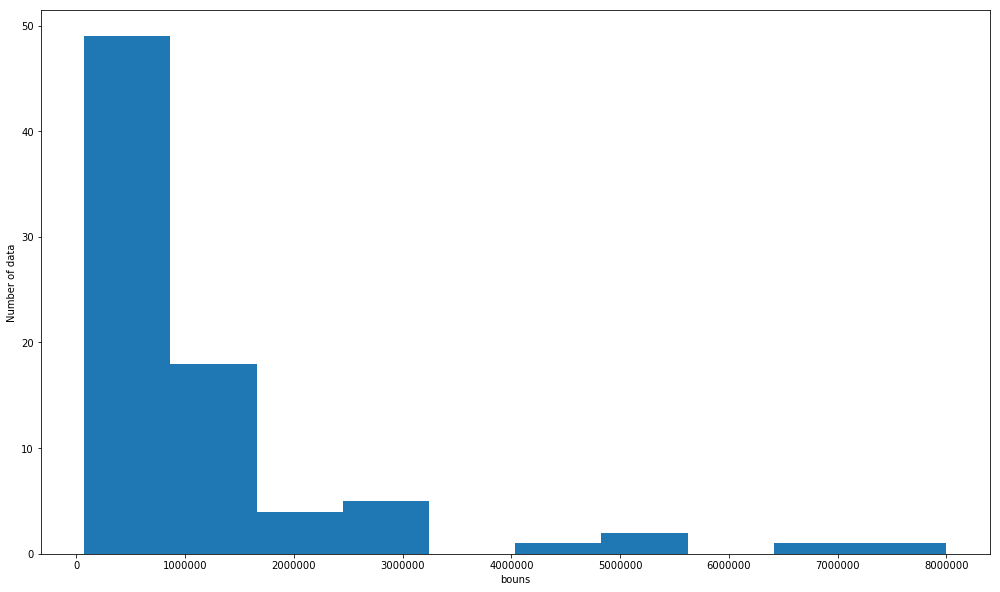

In [473]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['bonus'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('bouns')  
plt.show()

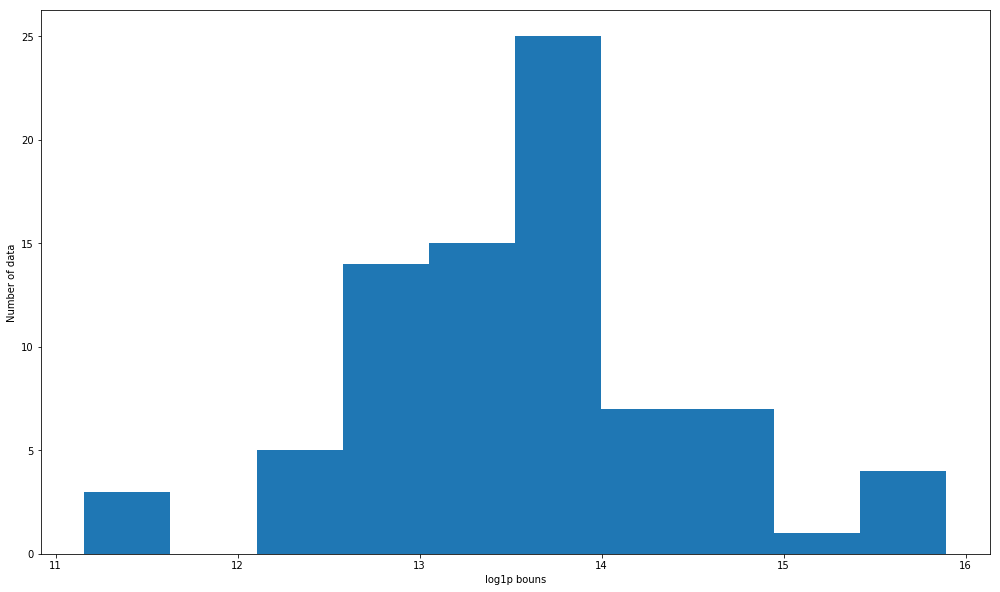

In [474]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(np.log1p(person_df['bonus'].dropna()))
plt.ylabel('Number of data')  
plt.xlabel('log1p bouns')  
plt.show()

In [475]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['bonus']=np.log1p(person_df['bonus'])
person_df['bonus'].fillna(person_df['bonus'].mean(),inplace=True)

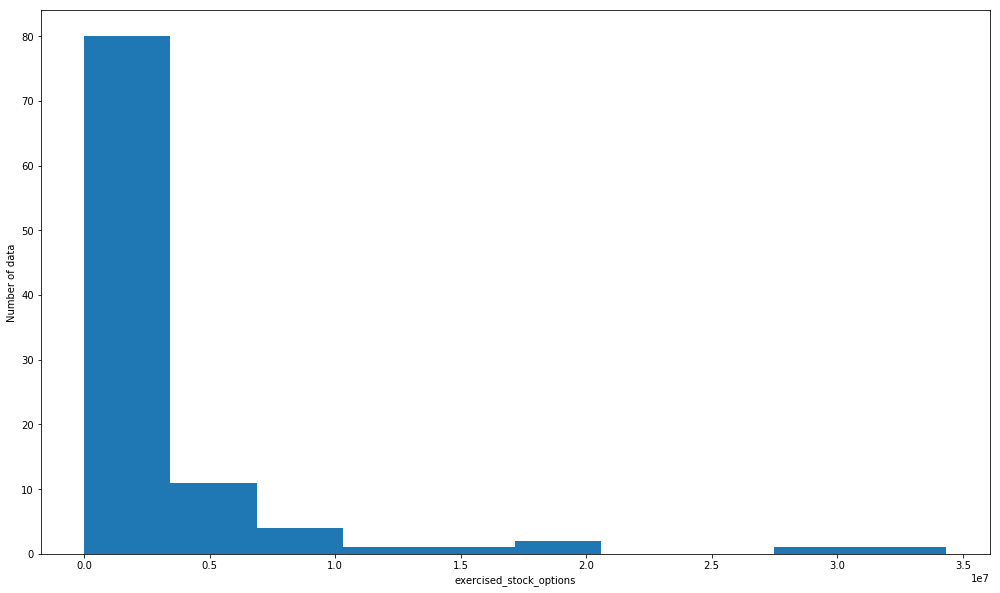

In [476]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['exercised_stock_options'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('exercised_stock_options')  
plt.show()

In [477]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['exercised_stock_options']=np.log1p(person_df['exercised_stock_options'])
person_df['exercised_stock_options'].fillna(person_df['exercised_stock_options'].mean(),inplace=True)

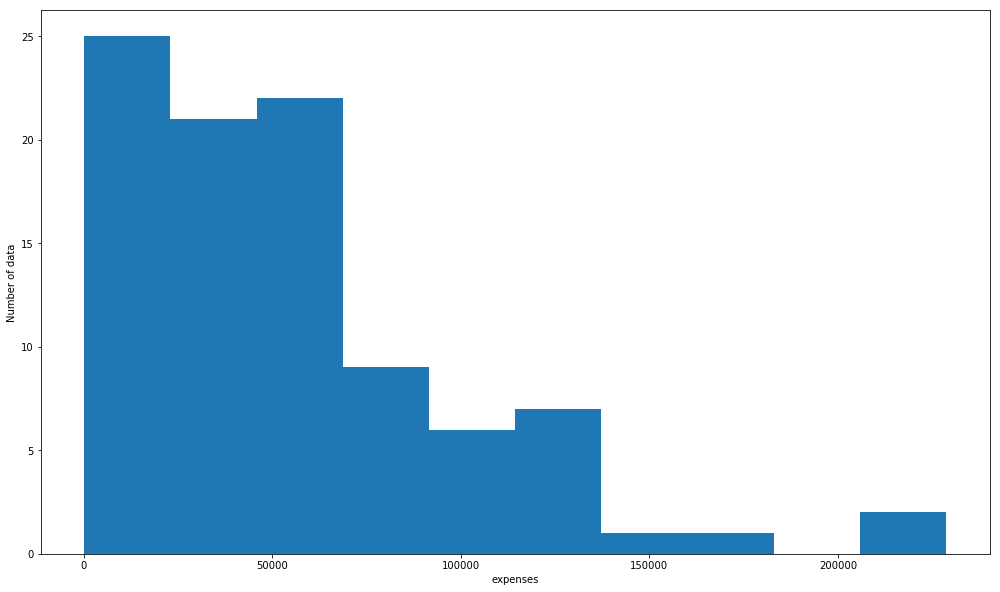

In [478]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['expenses'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('expenses')  
plt.show()

In [479]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['expenses']=np.log1p(person_df['expenses'])
person_df['expenses'].fillna(person_df['expenses'].mean(),inplace=True)

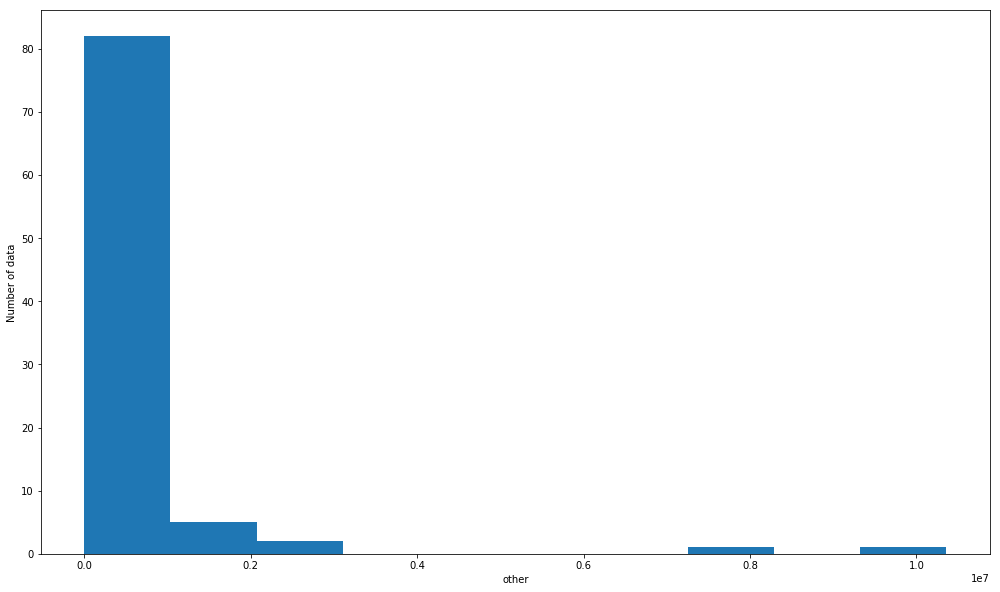

In [480]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['other'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('other')  
plt.show()

In [481]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['other']=np.log1p(person_df['other'])
person_df['other'].fillna(person_df['other'].mean(),inplace=True)

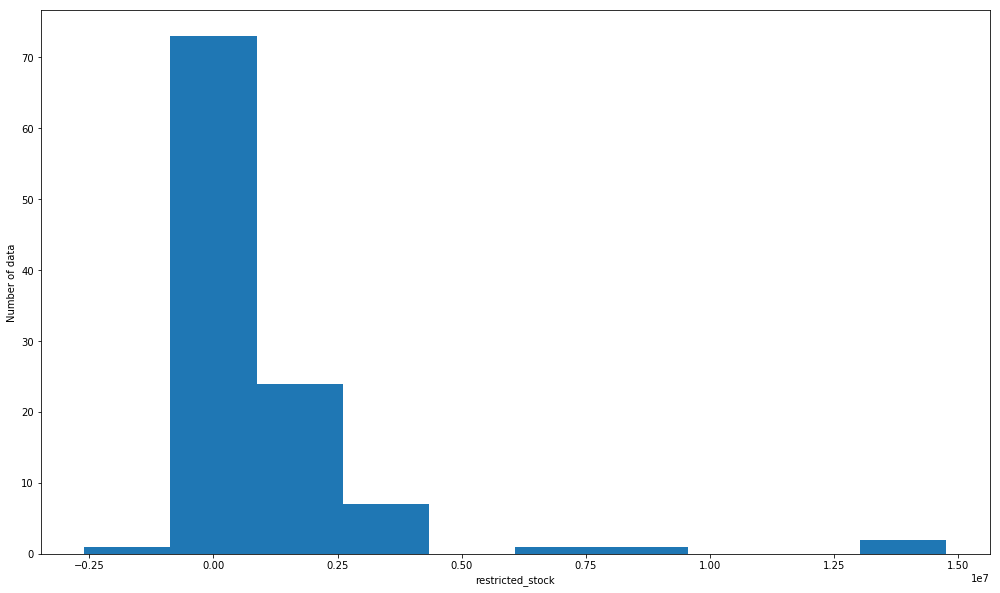

In [482]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['restricted_stock'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('restricted_stock')  
plt.show()

In [483]:
person_df['restricted_stock'].sort_values()

BHATNAGAR SANJAY              -2604490.000
CHAN RONNIE                      32460.000
JAEDICKE ROBERT                  44093.000
PIRO JIM                         47304.000
GILLIS JOHN                      75838.000
MCCARTY DANNY J                  94556.000
DIMICHELE RICHARD G             126027.000
KAMINSKI WINCENTY J             126027.000
CALGER CHRISTOPHER F            126027.000
ALLEN PHILLIP K                 126027.000
BECK SALLY W                    126027.000
DEFFNER JOSEPH M                141833.000
BAY FRANKLIN R                  145796.000
HAYES ROBERT E                  151418.000
LOWRY CHARLES P                 153686.000
BELDEN TIMOTHY N                157569.000
MORAN MICHAEL P                 161602.000
DURAN WILLIAM D                 189041.000
BLACHMAN JEREMY M               189041.000
BUCHANAN HAROLD G               189041.000
MURRAY JULIA H                  196983.000
REYNOLDS LAWRENCE               201483.000
CUMBERLAND MICHAEL S            207940.000
MORDAUNT KR

In [484]:
# 存在一个负值很奇怪，限制权股票我觉得不太可能是负数有可能是采集出错我将它转化为正数
person_df.loc[person_df.index=='BHATNAGAR SANJAY','restricted_stock']=abs(person_df['restricted_stock']['BHATNAGAR SANJAY'])

In [485]:
person_df['restricted_stock']['BHATNAGAR SANJAY']

2604490.0

In [486]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['restricted_stock']=np.log1p(person_df['restricted_stock'])
person_df['restricted_stock'].fillna(person_df['restricted_stock'].mean(),inplace=True)

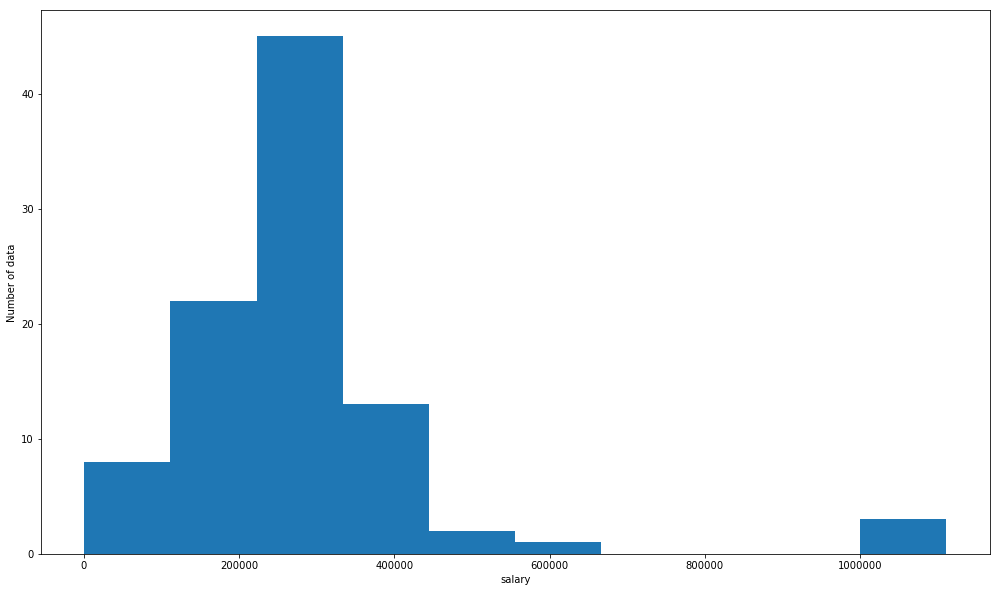

In [487]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['salary'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('salary')  
plt.show()

In [488]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['salary']=np.log1p(person_df['salary'])
person_df['salary'].fillna(person_df['salary'].mean(),inplace=True)

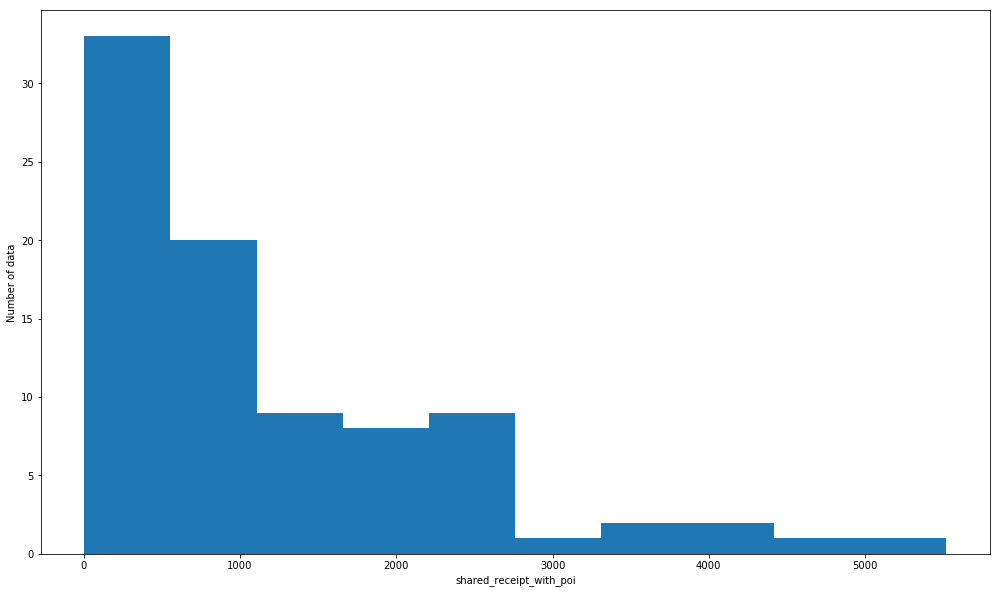

In [489]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['shared_receipt_with_poi'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('shared_receipt_with_poi')  
plt.show()

In [490]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['shared_receipt_with_poi']=np.log1p(person_df['shared_receipt_with_poi'])
person_df['shared_receipt_with_poi'].fillna(person_df['shared_receipt_with_poi'].mean(),inplace=True)

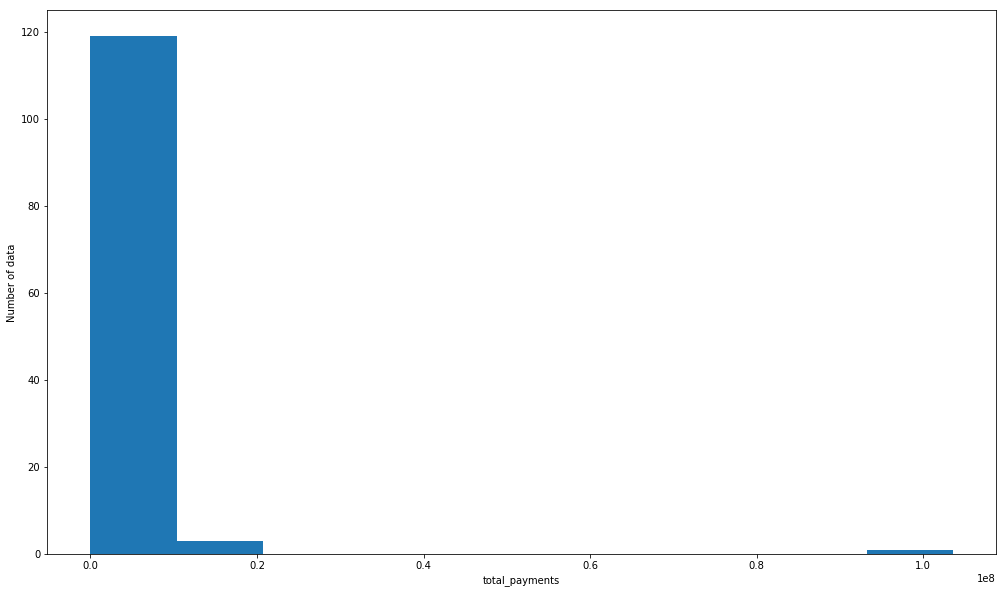

In [491]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['total_payments'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('total_payments')  
plt.show()

In [492]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['total_payments']=np.log1p(person_df['total_payments'])
person_df['total_payments'].fillna(person_df['total_payments'].mean(),inplace=True)

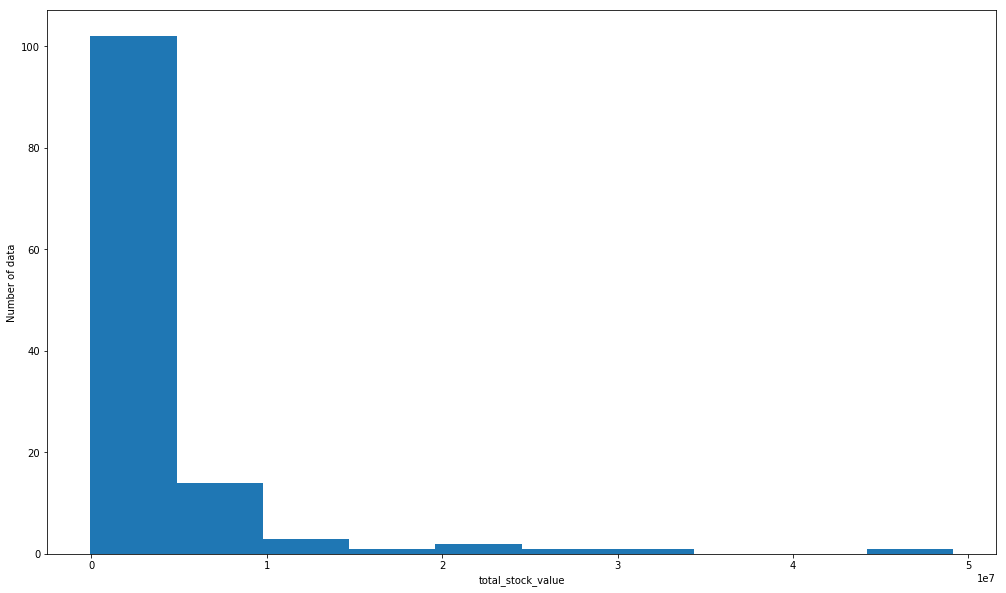

In [493]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['total_stock_value'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('total_stock_value')  
plt.show()

In [494]:
person_df['total_stock_value'].sort_values()

BELFER ROBERT               -44093.000
PICKERING MARK R             28798.000
PIRO JIM                     47304.000
BAY FRANKLIN R               63014.000
GILLIS JOHN                  85641.000
WHALEY DAVID A               98718.000
BECK SALLY W                126027.000
CALGER CHRISTOPHER F        126027.000
WROBEL BRUCE                139130.000
HAYES ROBERT E              151418.000
DEFFNER JOSEPH M            159211.000
FUGH JOHN L                 176378.000
CLINE KENNETH W             189518.000
YEAP SOON                   192758.000
CUMBERLAND MICHAEL S        207940.000
MORDAUNT KRISTINA M         208510.000
MORAN MICHAEL P             221141.000
BOWEN JR RAYMOND M          252055.000
BADUM JAMES P               257817.000
GAHN ROBERT S               318607.000
FOY JOE                     343434.000
HAYSLETT RODERICK J         346663.000
LEFF DANIEL P               360528.000
NOLES JAMES L               368705.000
DUNCAN JOHN H               371750.000
LOWRY CHARLES P          

In [495]:
# 存在一个负值很奇怪，将其做绝对值处理
person_df.loc[person_df.index=='BELFER ROBERT','total_stock_value']=abs(person_df['total_stock_value']['BELFER ROBERT'])

In [496]:
# 将其做对数处理后赋值并对其缺失值补充平均数
person_df['total_stock_value']=np.log1p(person_df['total_stock_value'])
person_df['total_stock_value'].fillna(person_df['total_stock_value'].mean(),inplace=True)

In [497]:
# 将from_messages,to_messages,from_this_person_to_poi,from_poi_to_this_person其做对数处理后赋值并对其缺失值补充平均数
person_df[['from_messages','to_messages','from_this_person_to_poi','from_poi_to_this_person']]=np.log1p(person_df[['from_messages','to_messages','from_this_person_to_poi','from_poi_to_this_person']])
person_df['from_messages'].fillna(person_df['from_messages'].mean(),inplace=True)
person_df['to_messages'].fillna(person_df['to_messages'].mean(),inplace=True)
person_df['from_this_person_to_poi'].fillna(person_df['from_this_person_to_poi'].mean(),inplace=True)
person_df['from_poi_to_this_person'].fillna(person_df['from_poi_to_this_person'].mean(),inplace=True)

In [498]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 16 columns):
bonus                      143 non-null float64
exercised_stock_options    143 non-null float64
expenses                   143 non-null float64
from_messages              143 non-null float64
from_poi_to_this_person    143 non-null float64
from_this_person_to_poi    143 non-null float64
other                      143 non-null float64
poi                        143 non-null bool
restricted_stock           143 non-null float64
salary                     143 non-null float64
shared_receipt_with_poi    143 non-null float64
to_messages                143 non-null float64
total_payments             143 non-null float64
total_stock_value          143 non-null float64
from_ratio                 143 non-null float64
to_ratio                   143 non-null float64
dtypes: bool(1), float64(15)
memory usage: 23.0+ KB


In [499]:
# 原有特征
features_list=['poi','bonus','exercised_stock_options','expenses','other','restricted_stock','salary','shared_receipt_with_poi','total_payments','total_stock_value','from_messages','to_messages','from_this_person_to_poi','from_poi_to_this_person']
# 新特征
features_list_new=['poi','bonus','exercised_stock_options','expenses','other','restricted_stock','salary','shared_receipt_with_poi','total_payments','total_stock_value','from_ratio','to_ratio']

In [500]:
data = featureFormat(person_df.to_dict(orient ='index'), features_list, sort_keys = True)
# person_df.to_dict(orient ='index')

In [501]:
labels, features = targetFeatureSplit(data)

In [502]:
# 选择用DecisionTree算法做原有特征和新特征的结果比对
# DecisionTree
# 原有特征
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=2)
test_classifier(clf, person_df.to_dict(orient ='index'), features_list)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.79707	Precision: 0.24831	Recall: 0.25750	F1: 0.25282	F2: 0.25561
	Total predictions: 15000	True positives:  515	False positives: 1559	False negatives: 1485	True negatives: 11441



In [503]:
# 选择用新特征验证
clf=DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=2)
test_classifier(clf, person_df.to_dict(orient ='index'), features_list_new)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.83953	Precision: 0.40155	Recall: 0.41500	F1: 0.40816	F2: 0.41224
	Total predictions: 15000	True positives:  830	False positives: 1237	False negatives: 1170	True negatives: 11763



In [541]:
# 之后就使用表现更好的新特征来做算法选择
data = featureFormat(person_df.to_dict(orient ='index'), features_list_new, sort_keys = True)
labels, features = targetFeatureSplit(data)

### 选择算法

In [542]:
%%time
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=2)
test_classifier(clf, person_df.to_dict(orient ='index'), features_list_new)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.83927	Precision: 0.40210	Recall: 0.42200	F1: 0.41181	F2: 0.41786
	Total predictions: 15000	True positives:  844	False positives: 1255	False negatives: 1156	True negatives: 11745

Wall time: 1.07 s


In [543]:
%%time
# LinearSVC
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
test_classifier(clf, person_df.to_dict(orient ='index'), features_list_new)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list_new)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
	Accuracy: 0.77473	Precision: 0.15679	Recall: 0.15750	F1: 0.15715	F2: 0.15736
	Total predictions: 15000	True positives:  315	False positives: 1694	False negatives: 1685	True negatives: 11306

Wall time: 6.71 s


In [544]:
%%time
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
test_classifier(clf, person_df.to_dict(orient ='index'), features_list_new)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list_new)

GaussianNB(priors=None)
	Accuracy: 0.81940	Precision: 0.34934	Recall: 0.41100	F1: 0.37767	F2: 0.39699
	Total predictions: 15000	True positives:  822	False positives: 1531	False negatives: 1178	True negatives: 11469

Wall time: 899 ms


In [545]:
%%time
# RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
test_classifier(clf, person_df.to_dict(orient ='index'), features_list_new)
dump_classifier_and_data(clf, person_df.to_dict(orient ='index'), features_list_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85947	Precision: 0.41483	Recall: 0.13150	F1: 0.19970	F2: 0.15230
	Total predictions: 15000	True positives:  263	False positives:  371	False negatives: 1737	True negatives: 12629

Wall time: 20.6 s


### 参数优化模型

In [546]:
from sklearn.model_selection import GridSearchCV

In [547]:
data = featureFormat(person_df.to_dict(orient ='index'), features_list_new, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [548]:
# DecisionTrees
parameters = {'min_samples_leaf':[1,2,3,4,5,6], 'min_samples_split':[2,3,4,5]}

dtclf = DecisionTreeClassifier()
scoring = ['precision', 'recall']
dtclf = GridSearchCV(dtclf, parameters,scoring='f1')
dtclf.fit(features, labels)
print dtclf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [549]:
dtclf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
test_classifier(dtclf, person_df.to_dict(orient ='index'), features_list_new)
dump_classifier_and_data(dtclf, person_df.to_dict(orient ='index'), features_list_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.85513	Precision: 0.44980	Recall: 0.38750	F1: 0.41633	F2: 0.39854
	Total predictions: 15000	True positives:  775	False positives:  948	False negatives: 1225	True negatives: 12052



### 加入交叉验证

In [550]:
from sklearn.model_selection import KFold, train_test_split

In [551]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, train_size=0.8)

regressor = DecisionTreeClassifier()
parameters = {'min_samples_leaf':[1,2,3,4,5,6], 'min_samples_split':[2,3,4,5]}
# scoring_fnc = make_scorer(accuracy_score)
kfold = KFold(n_splits=10)

grid = GridSearchCV(regressor, parameters, scoring='f1', cv=kfold)
grid = grid.fit(X_train, y_train)
reg = grid.best_estimator_

for key in parameters.keys():
    print('%s: %d'%(key, reg.get_params()[key]))



min_samples_split: 4
min_samples_leaf: 4


In [552]:
dtclf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
test_classifier(dtclf, person_df.to_dict(orient ='index'), features_list_new)
dump_classifier_and_data(dtclf, person_df.to_dict(orient ='index'), features_list_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.84653	Precision: 0.42225	Recall: 0.41000	F1: 0.41603	F2: 0.41239
	Total predictions: 15000	True positives:  820	False positives: 1122	False negatives: 1180	True negatives: 11878



### 加入特征选择

In [553]:
from sklearn.feature_selection import SelectFromModel
#选择特征重要性为1.25倍均值的特征
model = SelectFromModel(dtclf, threshold='1.25*mean',prefit=True)
#返回所选的特征(features, labels)
X_new = model.transform(features)
X_new.shape[1]
print model.get_support(True)
for i in model.get_support(True):
    print features_list_new[i+1]

[1 6 9]
exercised_stock_options
shared_receipt_with_poi
from_ratio


In [554]:
# 选择后的特征
features_list_selected=['poi','exercised_stock_options','shared_receipt_with_poi','from_ratio']

In [555]:
dtclf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
test_classifier(dtclf, person_df.to_dict(orient ='index'), features_list_selected)
dump_classifier_and_data(dtclf, person_df.to_dict(orient ='index'), features_list_selected)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.86587	Precision: 0.49598	Recall: 0.37050	F1: 0.42416	F2: 0.39025
	Total predictions: 15000	True positives:  741	False positives:  753	False negatives: 1259	True negatives: 12247

